In [2]:
import numpy as np


In [39]:
# network size N
N = 8
## start out with no infectious individuals
X = np.zeros(N)

## edge matrix 
E = np.array([[0,2],
              [1,2],
              [2,3],
              [2,4],
              [3,6],
              [5,3],
              [3,4],
              [4,7],
              [4,6]])

## number of edges
M = np.shape(E)[0]

## infection rate
b = 1.1

## initialize time
T = 0
## choose Tmax
Tmax = 5

## initial condition
X[2] = 1

## initialize number infected
I = np.sum(X)


## find the number of events that occur in the interval from T = 0 to T = Tmax
n = np.random.poisson(lam = Tmax*(N+b*M))
## find times for all inter-event times
inter_event_times = np.random.exponential(1/(N + b*M), n)
## find timestamps
times = np.cumsum(inter_event_times)
## initialize list of infected people for all timesteps
infected = np.zeros(n)


In [40]:
for i in range(n):

    T += np.random.exponential(1/(N + b*M))

    if np.random.random() < N/(N + b*M):

        x = np.random.randint(N)

        I -= X[x]

        X[x] = 0

    else:

        x,j = E[np.random.randint(M)]

        I += (int(X[x]) ^ int((X[j])))

        X[x] = X[j] = (X[x] or X[j])

    infected[i] = I


[0.03348922 0.06058684 0.07535042 0.08176468 0.16444232 0.33030305
 0.33064332 0.3510393  0.35310754 0.36032092 0.42911128 0.50559777
 0.63844045 0.67568112 0.69969026 0.73167246 0.75803859 0.76797834
 0.8493142  0.85545339 0.90910402 0.94334553 0.94683909 1.02271429
 1.04312973 1.05936844 1.12995625 1.17765278 1.32305058 1.3798722
 1.39726854 1.39775419 1.44349793 1.56631513 1.61918151 1.68352701
 1.72832996 1.74680747 1.88425952 1.89887211 1.91974446 1.96106361
 1.96308421 1.96589569 2.00968318 2.01046587 2.1095699  2.11538694
 2.12630049 2.20623796 2.25713809 2.27979062 2.32889874 2.34076678
 2.35519452 2.45320018 2.59119382 2.65353652 2.72298915 2.73116266
 2.7990009  2.79916028 2.80377463 2.81497657 2.88118974 2.96704556
 2.99371496 2.99933288 3.00065783 3.09724479 3.28429843 3.37731449
 3.59255525 3.63295695 3.81827442 3.83286247 3.93797059 3.93937483
 3.97956394 4.00956912 4.04617455 4.08399464 4.09709446 4.11758818
 4.17460075]


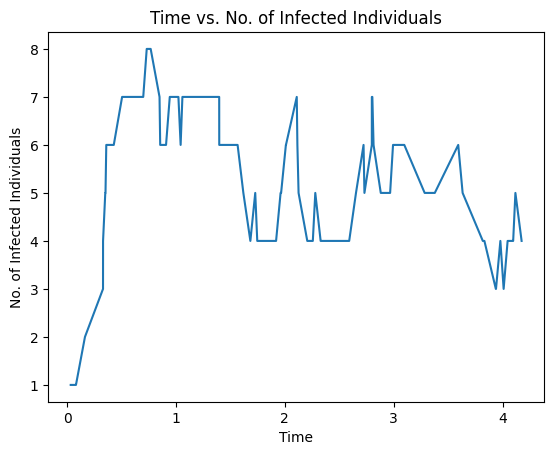

In [41]:
import matplotlib.pyplot as plt
print(times)
plt.plot(times, infected)
plt.title('Time vs. No. of Infected Individuals')
plt.ylabel('No. of Infected Individuals')
plt.xlabel('Time')
plt.show()
